## 슬라이딩 윈도우 예제

### 필요한 패키지 설치 : 설치 후 커널 restart

In [1]:
!pip install imutils
!pip install opencv-python
!pip install 'h5py<3.0.0'


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


### 패키지 import

In [2]:
# import the necessary packages
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
from imutils.object_detection import non_max_suppression
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import time
import cv2

### jupyter notebook 에서 이미지 표시

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
#     plt.xticks([])
#     plt.yticks([])
    plt.show()

<class 'numpy.ndarray'>
(393, 590, 3)


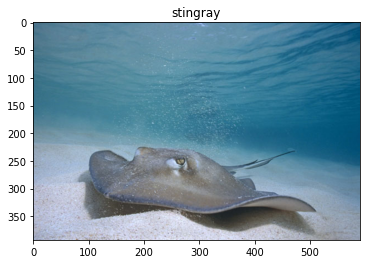

In [20]:
image = cv2.imread("images/stingray.jpg")
print(type(image))
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
# plt.grid(False)
plt.title("stingray")
# plt.xticks([])
# plt.yticks([])
plt.show()
# plt_imshow("stingray", image)

### 이미지 피라미드 및 슬라이딩 윈도우 유틸리티 기능 구현

In [31]:
a = np.arange(10000*3).reshape(100,100,3)
print(a.shape)
print(a[0].shape)
print(a[0:1].shape)
print(a[0:10,0:10].shape)
print(a[8:18,0:10].shape)

(100, 100, 3)
(100, 3)
(1, 100, 3)
(10, 10, 3)
(10, 10, 3)


In [ ]:
from PIL import Image
import cv2 
import IPython.display as display

# Load image
image = cv2.imread("images/stingray.jpg")

# Define the window size
window_size = (64, 64)

# Define the step size
step_size = (8, 8)

# Define how many steps to take in x and y directions
x_steps = np.arange(0, image.shape[1] - window_size[1], step_size[0])
y_steps = np.arange(0, image.shape[0] - window_size[0], step_size[1])
# print(x_steps)
# print(y_steps)
for y in y_steps:
    for x in x_steps:
        # Extract the window from the image
        window = image[y:y + window_size[1], x:x + window_size[0]]
#         print(image.shape)
#         print(window.shape) 
        clone = image.copy()
        # Here is where you would add your object detection code. 
        # For now we will just draw a rectangle around the window.
        cv2.rectangle(clone, (x, y), (x + window_size[0], y + window_size[1]), (255, 0, 0), 2)
#         plt_imshow("stingray", clone)
        clone = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)
        display.clear_output(wait=True)
        display.display(Image.fromarray(clone))
#     break

In [52]:
def foo():
    a = np.arange(100000)
    print("foo()")
    return
    print("after()")

foo()

foo()


In [57]:
def foo():
    a = np.arange(100000)
    print("foo()")
    yield
    print("after()")
    yield
    
g = foo()
next(g)
next(g)

foo()
after()


In [60]:
print(range(0, 30, 8))
print(list(range(0, 30, 8)))

for i in range(0, 30, 8):
    print(i)

range(0, 30, 8)
[0, 8, 16, 24]
0
8
16
24


In [65]:
def foo():
    return 1,2

a,b = foo()
print(a,b)

c = foo()
print(c)

d = 1,2
print(d)

e,f = (1,2)
print(e,f)

1 2
(1, 2)
(1, 2)
1 2


In [71]:
def foo():
    print("foo()")
    y=0
    for x in range(0, 30, 8):
        yield x,y
    
g = foo()
# print(g)
# ret = next(g)
# print(ret)
# ret = next(g)
# print(ret)
# ret = next(g)
# print(ret)
# ret = next(g)
# print(ret)
# ret = next(g)
# print(ret)
for elem in g:
    print(elem)

foo()
(0, 0)
(8, 0)
(16, 0)
(24, 0)


In [72]:
def sliding_window(image, step, ws):
    # slide a window across the image
    for y in range(0, image.shape[0] - ws[1], step):
        for x in range(0, image.shape[1] - ws[0], step):
            # yield the current window
            yield (x, y, image[y:y + ws[1], x:x + ws[0]])

In [ ]:
from PIL import Image
import cv2 
import IPython.display as display

# Load your image
image = cv2.imread("images/stingray.jpg")

# Define window size and step size
window_size = (64, 64)  # (width, height)
step_size = 8

# Iterate through the sliding windows
for (x, y, window) in sliding_window(image, step_size, window_size):
    if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
        continue

    # Optionally, visualize the sliding windows
    clone = image.copy()
    cv2.rectangle(clone, (x, y), (x + window_size[0], y + window_size[1]), (0, 255, 0), 2)
    clone = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)
#     plt_imshow("aaa", clone)
    display.clear_output(wait=True)
    display.display(Image.fromarray(clone))

In [74]:
def image_pyramid(image, scale=1.5, minSize=(128, 128)):
    # yield the original image
    yield image

    # keep looping over the image pyramid
    while True:
        # compute the dimensions of the next image in the pyramid
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)

        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break

        # yield the next image in the pyramid
        yield image

(393, 590, 3)


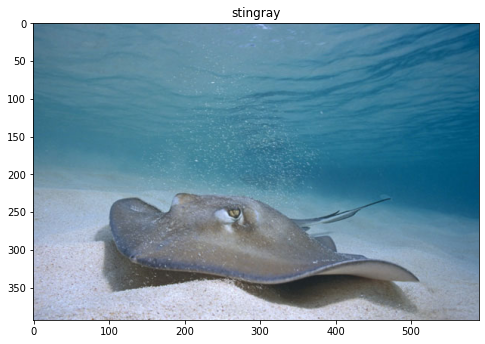

(261, 393, 3)


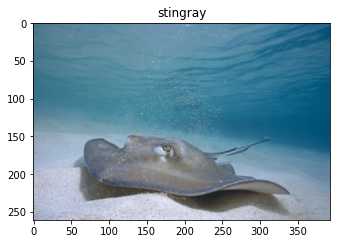

(174, 262, 3)


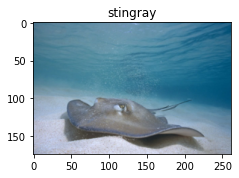

In [76]:
image = cv2.imread("images/stingray.jpg")

for im in image_pyramid(image):
    print(im.shape)
    h,w = im.shape[:2]
    dpi=(72,72)
    plt.figure(figsize = (w/dpi[0], h/dpi[0]), dpi=dpi[0])
    plt_imshow("stingray", im)
plt.show()

### 사전 학습된 이미지 분류자를 객체 감지기로 전환


In [82]:
value = '(10,20)'
print(value[0])
print(tuple(value))
print(eval(value))
print(eval(value)[0])

(
('(', '1', '0', ',', '2', '0', ')')
(10, 20)
10


In [ ]:
# python  sliding_window.py --image images/stingray.jpg --size (300, 150)

In [77]:
args = {
    "image": "images/stingray.jpg",
    "size": "(300, 150)",
    "min_conf": 0.9,
    "visualize": 1
}
# eval(args["size"])

In [78]:
# initialize variables used for the object detection procedure
WIDTH = 600
PYR_SCALE = 1.5
WIN_STEP = 16
ROI_SIZE = eval(args["size"])
INPUT_SIZE = (224, 224)

In [84]:
# load our network weights from disk
print("[INFO] loading network...")
model = ResNet50(weights="imagenet", include_top=True)
# model.summary()
# orig = cv2.imread(args["image"])
# orig = imutils.resize(orig, width=WIDTH)
# print(orig.shape)
# (H, W) = orig.shape[:2]
# print(H, W)


# load the input image from disk, resize it such that it has the
# has the supplied width, and then grab its dimensions
orig = cv2.imread(args["image"])
print(orig.shape)
orig = imutils.resize(orig, width=WIDTH)
(H, W) = orig.shape[:2]
print((H, W))

[INFO] loading network...
(393, 590, 3)
(399, 600)


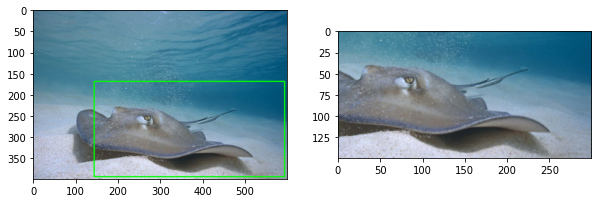

In [85]:
# initialize the image pyramid
pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)

# initialize two lists, one to hold the ROIs generated from the image
# pyramid and sliding window, and another list used to store the
# (x, y)-coordinates of where the ROI was in the original image
rois = []
locs = []

# time how long it takes to loop over the image pyramid layers and
# sliding window locations
start = time.time()

# loop over the image pyramid
for image in pyramid:
    # determine the scale factor between the *original* image
    # dimensions and the *current* layer of the pyramid
    scale = W / float(image.shape[1])

    # for each layer of the image pyramid, loop over the sliding
    # window locations
    for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
        # scale the (x, y)-coordinates of the ROI with respect to the
        # *original* image dimensions
        x = int(x * scale)
        y = int(y * scale)
        w = int(ROI_SIZE[0] * scale)
        h = int(ROI_SIZE[1] * scale)

        # take the ROI and preprocess it so we can later classify
        # the region using Keras/TensorFlow
        roi = cv2.resize(roiOrig, INPUT_SIZE)
        roi = img_to_array(roi)
        roi = preprocess_input(roi)

        # update our list of ROIs and associated coordinates
        rois.append(roi)
        locs.append((x, y, x + w, y + h))

        # check to see if we are visualizing each of the sliding
        # windows in the image pyramid
        if args["visualize"] > 0:
            # clone the original image and then draw a bounding box
            # surrounding the current region
            clone = orig.copy()
            cv2.rectangle(clone, (x, y), (x + w, y + h),
                (0, 255, 0), 2)

            plt.figure(figsize=(10, 20))
            plt.subplot(1,2,1)
            plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
            plt.subplot(1,2,2)
            plt.imshow(cv2.cvtColor(roiOrig, cv2.COLOR_BGR2RGB))
            plt.show()
            display.clear_output(wait=True)

In [87]:
# show how long it took to loop over the image pyramid layers and
# sliding window locations
end = time.time()
print("[INFO] looping over pyramid/windows took {:.5f} seconds".format(
    end - start))

# convert the ROIs to a NumPy array
rois = np.array(rois, dtype="float32")
print(rois.shape)

# classify each of the proposal ROIs using ResNet and then show how
# long the classifications took
print("[INFO] classifying ROIs...")
start = time.time()
preds = model.predict(rois)
end = time.time()
print("[INFO] classifying ROIs took {:.5f} seconds".format(
    end - start))

print(preds.shape) #(360,)
# print(preds)

# decode the predictions and initialize a dictionary which maps class
# labels (keys) to any ROIs associated with that label (values)
preds = imagenet_utils.decode_predictions(preds, top=1)
print(preds)
labels = {}



[INFO] looping over pyramid/windows took 225.31978 seconds
(360, 224, 224, 3)
[INFO] classifying ROIs...
[INFO] classifying ROIs took 40.38567 seconds
(360, 1000)
[[('n07860988', 'dough', 0.6460068)], [('n07860988', 'dough', 0.75130194)], [('n07860988', 'dough', 0.81994385)], [('n07860988', 'dough', 0.79067844)], [('n07860988', 'dough', 0.64633965)], [('n07860988', 'dough', 0.55227214)], [('n07860988', 'dough', 0.7748655)], [('n07860988', 'dough', 0.37303102)], [('n07860988', 'dough', 0.696053)], [('n07860988', 'dough', 0.42424935)], [('n07860988', 'dough', 0.41689053)], [('n07749582', 'lemon', 0.38965315)], [('n07749582', 'lemon', 0.5084526)], [('n07749582', 'lemon', 0.41781622)], [('n07749582', 'lemon', 0.66357183)], [('n07749582', 'lemon', 0.6115306)], [('n07749582', 'lemon', 0.51549935)], [('n07749582', 'lemon', 0.66039914)], [('n07749582', 'lemon', 0.6677052)], [('n07860988', 'dough', 0.6588179)], [('n07860988', 'dough', 0.77301675)], [('n07860988', 'dough', 0.7746723)], [('n07860

In [88]:
# loop over the predictions
for (i, p) in enumerate(preds):
#     print(i, p)
#     break
    # grab the prediction information for the current ROI
    (imagenetID, label, prob) = p[0]

    # filter out weak detections by ensuring the predicted probability
    # is greater than the minimum probability
    if prob >= args["min_conf"]:
        # grab the bounding box associated with the prediction and
        # convert the coordinates
        box = locs[i]

        # grab the list of predictions for the label and add the
        # bounding box and probability to the list
        L = labels.get(label, [])
#         print(L)
        L.append((box, prob))
#         print(L)
        labels[label] = L
#         print(labels)

print(labels)

{'stingray': [((176, 176, 476, 326), 0.9060029), ((0, 120, 450, 345), 0.96931267), ((96, 120, 546, 345), 0.906728)]}


[INFO] showing results for 'stingray'


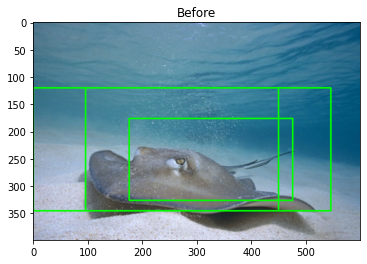

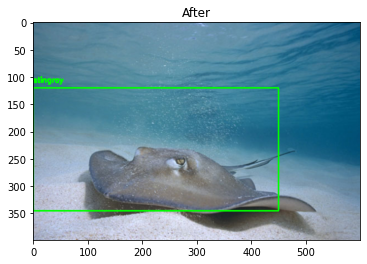

In [89]:
# loop over the labels for each of detected objects in the image
for label in labels.keys():
    # clone the original image so that we can draw on it
    print("[INFO] showing results for '{}'".format(label))
    clone = orig.copy()

    # loop over all bounding boxes for the current label
    for (box, prob) in labels[label]:
        # draw the bounding box on the image
        (startX, startY, endX, endY) = box
        cv2.rectangle(clone, (startX, startY), (endX, endY),
            (0, 255, 0), 2)

    # show the results *before* applying non-maxima suppression, then
    # clone the image again so we can display the results *after*
    # applying non-maxima suppression
    plt_imshow("Before", clone)
    clone = orig.copy()

    # extract the bounding boxes and associated prediction
    # probabilities, then apply non-maxima suppression
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    boxes = non_max_suppression(boxes, proba)

    # loop over all bounding boxes that were kept after applying
    # non-maxima suppression
    for (startX, startY, endX, endY) in boxes:
        # draw the bounding box and label on the image
        cv2.rectangle(clone, (startX, startY), (endX, endY),
            (0, 255, 0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(clone, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

    # show the output after apply non-maxima suppression
    plt_imshow("After", clone)